In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.layers import *
from keras.models import *
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau

Using TensorFlow backend.


bagian ini mengimport library dan module yang dibutuhkan, seperti NumPy, Pandas, OpenCV (cv2), Matplotlib, scikit-learn (sklearn), dan Keras. 

Format of the file: age_gender_ethnicity_datetime 

In [2]:
path = "/kaggle/input/utkface-new/UTKFace/"
files = os.listdir(path)
size = len(files)
print("Total samples:", size)
print(files[0])

Total samples: 23708
26_0_2_20170104023102422.jpg.chip.jpg


bagian menyimpan daftar file yang ada di direktori path ke dalam variabel files. 
os.listdir(path) digunakan untuk mengambil daftar file dalam direktori. size menampung jumlah file dalam direktori tersebut. jumlah file dan nama file pertama dicetak untuk melihat apakah sudah benar tersimpan 

In [3]:
images = []
ages = []
for file in files:
    image = cv2.imread(path + file, 0)
    image = cv2.resize(image, dsize=(64, 64))
    image = image.reshape((image.shape[0], image.shape[1], 1))
    images.append(image)
    split_var = file.split('_')
    ages.append(int(split_var[0]))

bagian ini digunakan untuk membaca setiap file gambar dalam direktori,  mengubahnya menjadi format yang sesuai, dan mengumpulkan gambar serta umur dari setiap file ke dalam list images dan ages secara berurutan.

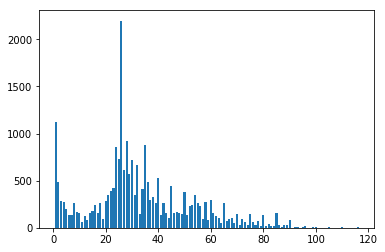

Max value: 116


In [4]:
x_ages = list(set(ages))
y_ages = [ages.count(i) for i in x_ages]
plt.bar(x_ages, y_ages)
plt.show()
print("Max value:", max(ages))

bagian ini memvisualisasikan distribusi frekuensi umur sekaligus mengetahui umur maksimum dari data tersebut untuk interpretasi data

Age: 54


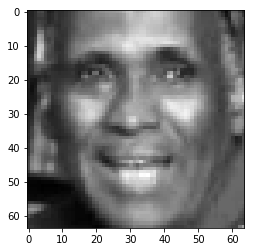

In [5]:
def display(img):
    plt.imshow(img[:, :, 0])
    plt.set_cmap('gray')
    plt.show()
    
idx = 500
sample = images[idx]
print("Age:", ages[idx])
display(sample)

bagian ini menampilkan salah satu gambar yang ada di dataset serta label umurnya. bagian ini dilakukan untuk mengevaluasi kualitas dataset. 

In [6]:
def age_group(age):
    if age >= 0 and age < 18:
        return 1
    elif age < 30:
        return 2
    elif age < 80:
        return 3
    else:
        return 4

bagian ini mengkategorikan umur menjadi beberapa grup yang akan digunakan untuk klasifikasi.

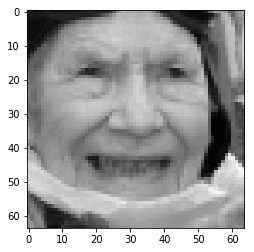

In [7]:
target = np.zeros((size, 1), dtype='float32')
features = np.zeros((size, sample.shape[0], sample.shape[1], 1), dtype='float32')
for i in range(size):
    target[i] = age_group(ages[i]) - 1  # Age groups start from 0 for classification
    features[i] = images[i]
features = features / 255
display(features[550])

menampilkan salah satu contoh fitur yang telah dinormalisasi dari array features, yaitu features[550]. 

In [8]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, shuffle=True)
print("Samples in Training:", x_train.shape[0])
print("Samples in Testing:", x_test.shape[0])

Samples in Training: 18966
Samples in Testing: 4742


bagian ini membagi data menjadi data testing dan training menggunakan fungsi train_test_split dari library scikit-learn. data dibagi menjadi 80% data training dan 20% data terting.kemudian dicetak jumlah sampel yang ada di masing-masing set untuk melihat seberapa banyak data yang digunakan pada masing-masing set

In [9]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 1)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

bagian ini mendefinisikan aritektur model yang akan digunakan dengan keras.  Model dibangun menggunakan Sequential API dari Keras. Pertama, Conv2D layer dengan 32 filter dan ukuran kernel (3, 3) digunakan sebagai layer pertama, dengan fungsi aktivasi ReLU. Input dari layer ini memiliki ukuran (64, 64, 1), sesuai dengan dimensi gambar yang telah diubah sebelumnya. Setelah itu, BatchNormalization layer digunakan untuk normalisasi output dari layer sebelumnya. Langkah ini membantu meningkatkan stabilitas dan kecepatan konvergensi model.Proses yang serupa dilakukan dengan Conv2D layer selanjutnya, yaitu Conv2D dengan 64 filter, BatchNormalization, dan fungsi aktivasi ReLU. Kemudian, MaxPooling2D layer dengan pool size (2, 2) digunakan untuk mengurangi dimensi spatial data. Dilanjutkan dengan Conv2D layer dengan 128 filter, BatchNormalization, dan MaxPooling2D lagi untuk mengekstraksi fitur-fitur yang lebih kompleks.Selanjutnya, dilakukan Dropout regularization dengan tingkat dropout 0.25 untuk mengurangi overfitting pada model. Layer Flatten digunakan untuk mengubah output menjadi vektor satu dimensi. Kemudian, dilanjutkan dengan beberapa Dense layer dengan fungsi aktivasi ReLU dan Dropout regularization untuk mencegah overfitting. Akhirnya, Dense layer terakhir dengan 4 unit dan fungsi aktivasi softmax digunakan untuk melakukan klasifikasi pada 4 kelas yang berbeda.

In [10]:
optimizer = Adam(lr=0.0005)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

bagian ini mendefinisikan pengoptimalan dan kompilasi model dalam Keras. digunakan optimizer Adam dengan learning rate (lr) sebesar 0.0005. Selanjutnya, model dikompilasi menggunakan metrik loss 'sparse_categorical_crossentropy'.Selain itu, metrik akurasi juga ditentukan untuk memantau kinerja model selama pelatihan dan evaluasi. 

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 62, 62, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 60, 60, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
batch_normalization_3 (Batch (None, 28, 28, 128)      

bagian ini menampilkan ringkasan atau gambaran keseluruhan dari arsitektur model yang telah dibangun. 

In [12]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0005)

bagian ini mengimplementasikan ReduceLROnPlateau callback pada model. hal tersebut digunakan dalam pelatihan model untuk mengurangi learning rate (tingkat pembelajaran) saat model tidak mengalami peningkatan dalam hal validasi loss dalam beberapa epoch yang ditentukan.Hal ini dilakukan untuk mempercepat konvergensi model, mencegah overfitting, dan meningkatkan akurasi dan kinerja keseluruhan model.

In [13]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=25, batch_size=128, shuffle=True,
                    callbacks=[reduce_lr])

Train on 18966 samples, validate on 4742 samples
Epoch 1/25
18966/18966 [==============================] - 268s 14ms/step - loss: 1.3742 - accuracy: 0.4393 - val_loss: 1.5613 - val_accuracy: 0.3146
Epoch 2/25
18966/18966 [==============================] - 267s 14ms/step - loss: 1.1230 - accuracy: 0.4988 - val_loss: 1.4392 - val_accuracy: 0.4707
Epoch 3/25
18966/18966 [==============================] - 267s 14ms/step - loss: 1.0613 - accuracy: 0.5129 - val_loss: 0.9559 - val_accuracy: 0.5548
Epoch 4/25
18966/18966 [==============================] - 268s 14ms/step - loss: 1.0374 - accuracy: 0.5115 - val_loss: 0.8652 - val_accuracy: 0.5886
Epoch 5/25
18966/18966 [==============================] - 267s 14ms/step - loss: 1.0187 - accuracy: 0.5243 - val_loss: 0.8498 - val_accuracy: 0.5812
Epoch 6/25
18966/18966 [==============================] - 268s 14ms/step - loss: 0.9598 - accuracy: 0.5561 - val_loss: 0.8101 - val_accuracy: 0.5922
Epoch 7/25
18966/18966 [==============================] -

bagian ini melatih model menggunakan data pelatihan x_train dan label y_train. Model akan divalidasi menggunakan data validasi x_test dan label validasi y_test pada setiap epoch selama 25 epoch.Selama pelatihan, callback ReduceLROnPlateau yang telah didefinisikan sebelumnya akan diaktifkan untuk memantau validasi loss dan menyesuaikan learning rate jika diperlukan.

In [14]:
model.save('data.h5')

bagian ini menyimpan model yang telah dilatih ke dalam file dengan format Hierarchical Data Format (HDF5) yang memiliki ekstensi .h5.

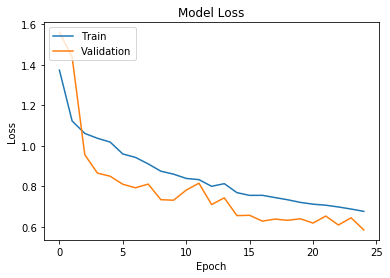

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

bagian ini menggambar grafik loss model selama proses pelatihan.

In [16]:
def display(img):
    plt.imshow(img[:, :, 0])
    plt.set_cmap('gray')
    plt.show()

bagian ini mendefinisikan fungsi display yang digunakan untuk menampilkan gambar secara visual. Ketika fungsi display dipanggil dengan argumen img, gambar akan ditampilkan menggunakan plt.imshow

In [17]:
def get_age(distr):
    if distr == 0:
        return "0-18"
    elif distr == 1:
        return "19-30"
    elif distr == 2:
        return "31-80"
    elif distr == 3:
        return "80+"
    return "Unknown"

bagian ini mendefinisikan fungsi get_age yang digunakan untuk mengembalikan rentang usia. Ketika fungsi get_age dipanggil dengan argumen distr, akan dilakukan pemilihan berdasarkan nilai distr menggunakan struktur percabangan if-elif-else. 

In [18]:
def get_result(sample):
    sample = sample / 255
    val = model.predict(np.array([sample]))
    age_group = np.argmax(val[0])  # Get the predicted age group
    age = get_age(age_group)
    print("Values:", val, "\nPredicted Age:", age)

bagian ini mendefinisikan fungsi get_result yang digunakan untuk mendapatkan hasil prediksi usia berdasarkan gambar contoh yang diberikan.

In [19]:
indexes = [500, 59, 80, 2, 4546, 7, 9, 256, 45]

bagian ini mendefinisikan indeks-indeks gambar yang akan ditampilkan gambar, label umur asli serta label prediksinya

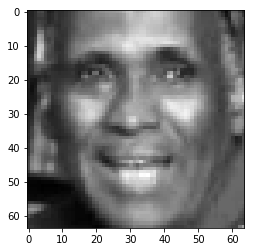

Actual Age: 54
Values: [[1.1978914e-06 3.7271317e-02 9.4513822e-01 1.7589206e-02]] 
Predicted Age: 31-80


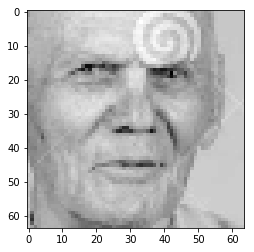

Actual Age: 82
Values: [[4.7927387e-12 2.6069555e-04 8.0905116e-01 1.9068813e-01]] 
Predicted Age: 31-80


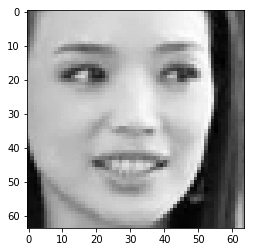

Actual Age: 24
Values: [[0.13192332 0.57426846 0.28700915 0.00679905]] 
Predicted Age: 19-30


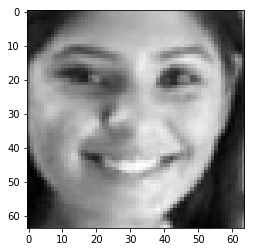

Actual Age: 21
Values: [[0.13192332 0.57426846 0.28700915 0.00679905]] 
Predicted Age: 19-30


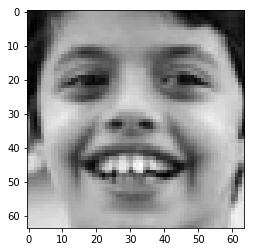

Actual Age: 7
Values: [[9.7416401e-01 2.5039354e-02 7.3944824e-04 5.7292393e-05]] 
Predicted Age: 0-18


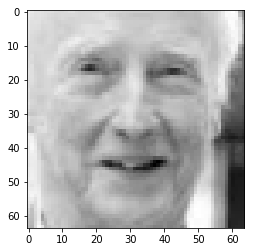

Actual Age: 76
Values: [[1.9309254e-09 3.5632695e-03 9.3538934e-01 6.1047364e-02]] 
Predicted Age: 31-80


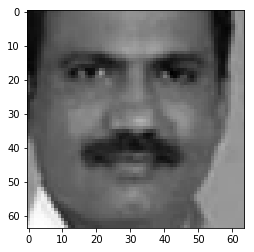

Actual Age: 34
Values: [[3.8391207e-07 3.5740923e-02 9.6050972e-01 3.7489042e-03]] 
Predicted Age: 31-80


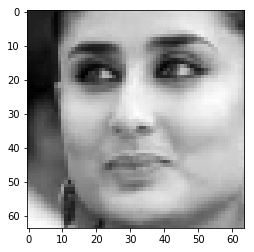

Actual Age: 25
Values: [[0.13192332 0.57426846 0.28700915 0.00679905]] 
Predicted Age: 19-30


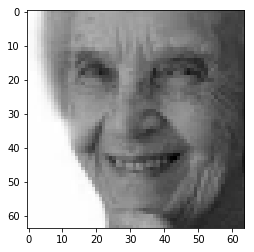

Actual Age: 79
Values: [[5.6093728e-07 1.0710400e-02 7.9000056e-01 1.9928849e-01]] 
Predicted Age: 31-80


In [20]:
for idx in indexes:
    sample = images[idx]
    display(sample)
    print("Actual Age:", ages[idx])
    get_result(sample)

bagian ini memanggil fungsi get result tadi untuk menampilkan gambar dan labelnya.  Pertama, gambar contoh dipilih berdasarkan indeks tersebut dari dataset gambar yang telah diolah sebelumnya. Gambar tersebut kemudian ditampilkan menggunakan fungsi display. Selanjutnya, usia aktual dari gambar contoh dicetak menggunakan print. Terakhir, gambar contoh tersebut digunakan sebagai input untuk fungsi get_result, yang memberikan prediksi usia berdasarkan gambar tersebut.

In [21]:
evaluation = model.evaluate(x_test, y_test[:, 0])

print("accuracy",evaluation[1])

4742/4742 [==============================] - 15s 3ms/step
accuracy 0.748418390750885


bagian ini mengevaluasi performa model melalui model.evaluate. 